In [36]:
import pandas as pd
import gensim
from gensim import corpora
from pprint import pprint
import spacy
import re     
import numpy as np
# Plotting tools
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
import pickle
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from Preprocess import Preprocess
from Viz import Viz
from LDA import LDA
import tmtoolkit.topicmod.tm_gensim
from tmtoolkit.topicmod.tm_gensim import evaluate_topic_models
from tmtoolkit.topicmod.evaluate import results_by_parameter

[nltk_data] Downloading package punkt to /Users/shruti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/shruti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
def evaluate(data, top_l, top_h, step, texts):

    var_params = [{'num_topics': k, 'alpha': 1/k} for k in range(top_l, top_h, step)]
    const_params = {'iterations': 1000, 'eta': 0.1,'random_state': 20191122}  # to make results reproducible}
    eval_results = evaluate_topic_models(data, 
                                         varying_parameters=var_params,
                                         constant_parameters=const_params,
                                         return_models=True, coherence_gensim_texts=texts,
                                        metrics = tmtoolkit.topicmod.tm_gensim.DEFAULT_METRICS)
    
    eval_results_by_topics = results_by_parameter(eval_results, 'num_topics')

    from tmtoolkit.topicmod.visualize import plot_eval_results

    plot_eval_results(eval_results_by_topics)
    
    return eval_results_by_topics

# 1. 2014-2015

In [3]:
infile = open('Pickled_Data/1415_data.pkl','rb')
id_1 =  pickle.load(infile)
corpus1 = pickle.load(infile)
stop1 = pickle.load(infile)

/Users/shruti/opt/anaconda3/lib/python3.7/site-packages/tmtoolkit/topicmod/visualize.py:561: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(**subplots_adjust_kwargs)


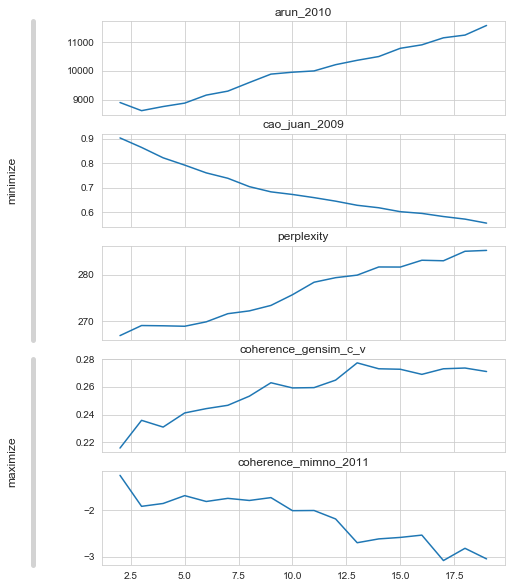

In [4]:
results1 = evaluate((id_1, corpus1), 2, 20, 1, stop1)

In [28]:
best_tm = [m for k, m in results1 if k == 5][0]['model']
best_tm.num_topics, best_tm.alpha, best_tm.eta  # just to make sure

(5,
 array([0.2, 0.2, 0.2, 0.2, 0.2], dtype=float32),
 array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1], dtype=float32))

In [29]:
model_1415 = LDA(id_1, corpus1, 6, stop1, best_tm)


Coherence Score:  0.2411824219691563


5


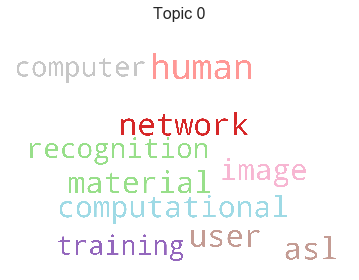

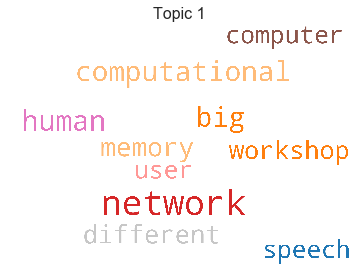

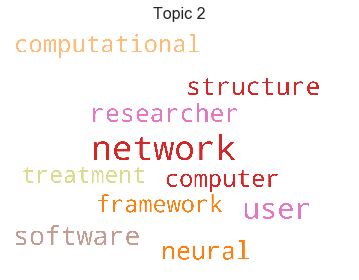

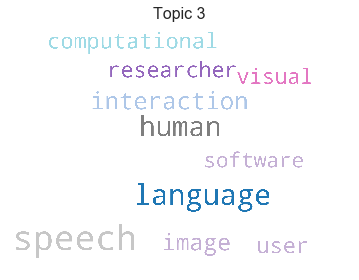

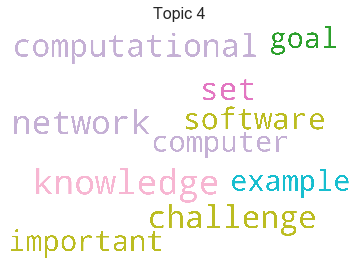

[(0,
  [('human', 0.0055836043),
   ('network', 0.0044745225),
   ('asl', 0.0043361634),
   ('user', 0.0043280562),
   ('material', 0.0041536125),
   ('computational', 0.0040303413),
   ('image', 0.003915033),
   ('computer', 0.0034686083),
   ('recognition', 0.003452959),
   ('training', 0.0032163342)]),
 (1,
  [('network', 0.0066720652),
   ('human', 0.0041792006),
   ('computational', 0.004040913),
   ('big', 0.0038757296),
   ('memory', 0.0035900925),
   ('different', 0.003422293),
   ('workshop', 0.003302992),
   ('user', 0.0032050535),
   ('computer', 0.0031577186),
   ('speech', 0.0031156945)]),
 (2,
  [('network', 0.007339058),
   ('user', 0.0049031177),
   ('software', 0.0041250256),
   ('neural', 0.0035917542),
   ('structure', 0.0035729727),
   ('researcher', 0.0035601265),
   ('computational', 0.0032992193),
   ('computer', 0.0032925599),
   ('framework', 0.0031680574),
   ('treatment', 0.003031255)]),
 (3,
  [('speech', 0.009146479),
   ('language', 0.005999779),
   ('huma

In [30]:
model_1415.topic_wordcloud(10, plot=True)

In [33]:
file = open('1415_model.pkl','wb')
pickle.dump(best_tm, file)

In [31]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_1415.model, corpus1, dictionary=model_1415.model.id2word)

/Users/shruti/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [32]:
pyLDAvis.save_html(vis, 'Visualization/1415_model.html')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.025880  0.018657       1        1  26.696119
3      0.067587  0.032549       2        1  26.050795
4     -0.045137 -0.006067       3        1  18.847298
1      0.008288 -0.084927       4        1  15.541038
2     -0.056619  0.039788       5        1  12.864749, topic_info=    Category        Freq       Term       Total  loglift  logprob
132  Default  254.000000     speech  254.000000  30.0000  30.0000
406  Default   97.000000        asl   97.000000  29.0000  29.0000
89   Default  327.000000    network  327.000000  28.0000  28.0000
46   Default   31.000000         dl   31.000000  27.0000  27.0000
549  Default   43.000000  treatment   43.000000  26.0000  26.0000
..       ...         ...        ...         ...      ...      ...
202   Topic5   25.563730       goal  187.471664   0.0582  -5.9207
5     Topic5   25.054192      allow  183.703094   0.0584  -5.9408
232   Topic5   23.817135  potential  153.538971   0.1871  -5.9914
71    Topic5   24.206648     impact  197.433823  -0.0481  -5.9752
125   Topic5   23.318531        set  197.804153  -0.0873  -6.0126

[453 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
3441      2  0.256820         aaai
3441      5  0.642050         aaai
1603      5  0.989123           ab
0         1  0.272373  accelerator
0         2  0.068093  accelerator
...     ...       ...          ...
157       2  0.167576     workshop
157       3  0.319192     workshop
157       4  0.303232     workshop
157       5  0.063838     workshop
2284      1  0.993901         york

[998 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 5, 2, 3])

In [3]:
file = open('Pickled_models/1415_model.pkl','rb')
best_tm = pickle.load(file)

In [4]:
model_1415 = LDA(id_1, corpus1, 6, stop1, best_tm)


Coherence Score:  0.2640047724411743


In [5]:
dir_ = model_1415.dominant_directorate('Raw_Data/Awards1415.csv')

0
100
200
300
400


In [6]:
dir_

{0: {'MPS': 7, 'CSE': 62, 'ENG': 17, 'BIO': 5, 'SBE': 9, 'EHR': 2, 'O/D': 1},
 1: {'CSE': 73, 'MPS': 13, 'SBE': 4, 'ENG': 11, 'O/D': 3, 'BIO': 4, 'EHR': 2},
 2: {'CSE': 70, 'EHR': 7, 'ENG': 10, 'SBE': 7, 'MPS': 9, 'O/D': 2},
 3: {'MPS': 20, 'ENG': 14, 'CSE': 77, 'BIO': 7, 'SBE': 18, 'EHR': 5, 'O/D': 2},
 4: {'CSE': 42, 'BIO': 2, 'ENG': 9, 'SBE': 4, 'EHR': 2, 'MPS': 2},
 5: {'ENG': 14, 'CSE': 63, 'SBE': 5, 'MPS': 6, 'GEO': 1, 'BIO': 1}}

In [34]:
docs_top_20 = model_1415.dominant_topics(10)

0
100
200
300
400


In [8]:
docs_top_20

{0: [[426, 349, 348, 19, 209, 289, 279, 246, 142, 394]],
 1: [[406, 155, 208, 214, 161, 0, 1, 2, 113, 133]],
 2: [[272, 266, 26, 407, 34, 170, 168, 197, 281, 117]],
 3: [[24, 104, 356, 186, 237, 10, 434, 16, 414, 131]],
 4: [[81, 110, 230, 105, 388, 166, 318, 429, 395, 418]],
 5: [[335, 4, 422, 338, 364, 370, 399, 183, 198, 147]]}

In [35]:
file = open('Pickled_docs/1415_top_20.pkl','wb')
pickle.dump(docs_top_20, file)

In [36]:
docs_top_20

{0: [[313, 312, 276, 267, 275, 155, 186, 81, 289, 279]],
 1: [[378, 121, 104, 356, 295, 339, 344, 424, 394, 1]],
 2: [[272, 266, 25, 364, 370, 142, 139, 327, 271, 317]],
 3: [[365, 88, 231, 233, 59, 208, 214, 348, 349, 161]],
 4: [[406, 110, 335, 37, 434, 133, 372, 228, 229, 343]],
 5: [[]]}

# 2. 2015-2016 

In [37]:
infile = open('Pickled_Data/1516_data.pkl','rb')
id_1 =  pickle.load(infile)
corpus1 = pickle.load(infile)
stop1 = pickle.load(infile)
print(len(corpus1))

543


/Users/shruti/opt/anaconda3/lib/python3.7/site-packages/tmtoolkit/topicmod/visualize.py:561: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(**subplots_adjust_kwargs)


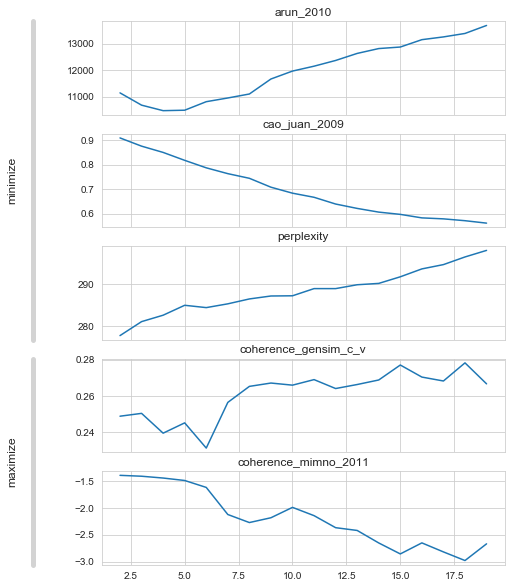

In [38]:
results1 = evaluate((id_1, corpus1), 2, 20, 1, stop1)

In [47]:
best_tm = [m for k, m in results1 if k == 6][0]['model']
best_tm.num_topics, best_tm.alpha, best_tm.eta  # just to make sure

(6, array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667], dtype=float32), array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1], dtype=float32))


Coherence Score:  0.2314483489819327
6


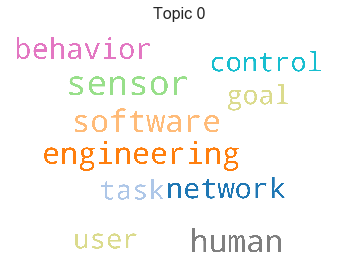

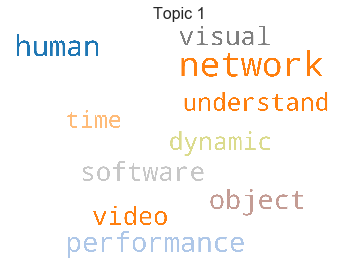

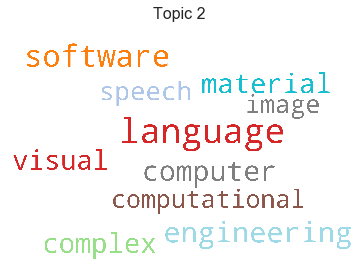

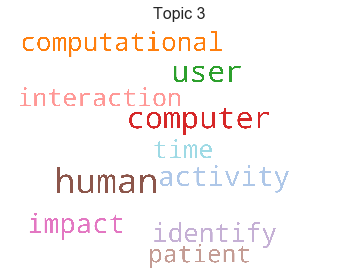

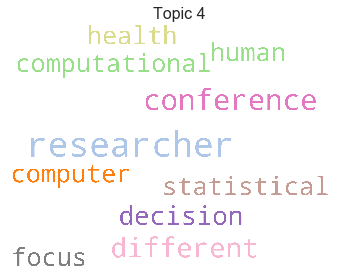

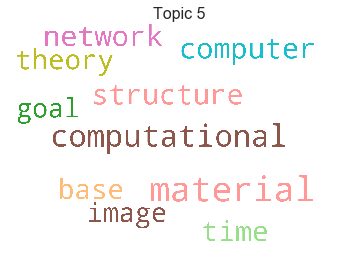

[(0,
  [('sensor', 0.005418859),
   ('human', 0.0043377406),
   ('software', 0.0043234727),
   ('engineering', 0.0040210555),
   ('behavior', 0.0036936353),
   ('network', 0.00362064),
   ('user', 0.0033275643),
   ('task', 0.0032796839),
   ('control', 0.0032109285),
   ('goal', 0.0031112619)]),
 (1,
  [('network', 0.006657162),
   ('human', 0.0043867123),
   ('performance', 0.0039721685),
   ('object', 0.0039096316),
   ('software', 0.0036487603),
   ('visual', 0.003581937),
   ('video', 0.0034785576),
   ('dynamic', 0.003337724),
   ('understand', 0.0032177938),
   ('time', 0.0029843254)]),
 (2,
  [('language', 0.0071294676),
   ('software', 0.005407747),
   ('engineering', 0.0047153425),
   ('computer', 0.004575962),
   ('complex', 0.004325069),
   ('material', 0.004317532),
   ('visual', 0.0042007025),
   ('speech', 0.0039083753),
   ('image', 0.0036764913),
   ('computational', 0.0036330079)]),
 (3,
  [('human', 0.0056690597),
   ('computer', 0.0042288904),
   ('user', 0.00419889

In [48]:
model_1516 = LDA(id_1, corpus1, 6, stop1, best_tm)
model_1516.topic_wordcloud(10, plot=True)

In [51]:
file = open('Pickled_models/1516_model.pkl','wb')
pickle.dump(best_tm, file)

In [49]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_1516.model, corpus1, dictionary=model_1516.model.id2word)

/Users/shruti/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [50]:
pyLDAvis.save_html(vis, 'Visualization/1516_model.html')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.000581 -0.037248       1        1  24.061798
0     -0.003566  0.001953       2        1  22.706772
1     -0.013396  0.010282       3        1  20.722355
3      0.052309 -0.056546       4        1  13.323842
4      0.052508  0.073341       5        1  10.317451
2     -0.088436  0.008218       6        1   8.867784, topic_info=     Category        Freq        Term       Total  loglift  logprob
72    Default  205.000000    language  205.000000  30.0000  30.0000
1155  Default  237.000000    material  237.000000  29.0000  29.0000
376   Default   75.000000      speech   75.000000  28.0000  28.0000
635   Default  194.000000      visual  194.000000  27.0000  27.0000
533   Default  214.000000  researcher  214.000000  26.0000  26.0000
...       ...         ...         ...         ...      ...      ...
860    Topic6   19.498240   computing  142.731934   0.4321  -6.0619
313    Topic6   21.695297       focus  218.960327   0.1110  -5.9551
399    Topic6   21.725227        base  246.147827  -0.0047  -5.9537
150    Topic6   20.590929       allow  179.881882   0.2553  -6.0074
383    Topic6   20.571459        time  250.293274  -0.0760  -6.0083

[553 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
642       1  0.053879       acoustic
642       2  0.053879       acoustic
642       3  0.646542       acoustic
642       5  0.053879       acoustic
642       6  0.215514       acoustic
...     ...       ...            ...
1386      4  0.154524           word
1386      5  0.077262           word
1386      6  0.046357           word
6769      4  0.873131  workreadygrad
638       3  0.934760        yearold

[1356 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 2, 4, 5, 3])

In [19]:
file = open('Pickled_models/1516_model.pkl','rb')
best_tm = pickle.load(file)
model_1516 = LDA(id_1, corpus1, 5, stop1, best_tm)


Coherence Score:  0.24779917478630634


In [14]:
dir_ = model_1516.dominant_directorate('Raw_Data/Awards1516.csv')
dir_

0
100
200
300
400
500


{0: {'ENG': 35, 'CSE': 89, 'BIO': 8, 'EHR': 4, 'SBE': 10, 'MPS': 14, 'O/D': 3},
 1: {'CSE': 77, 'MPS': 14, 'ENG': 33, 'SBE': 12, 'GEO': 2, 'EHR': 7, 'BIO': 2},
 2: {'MPS': 16, 'O/D': 3, 'CSE': 68, 'SBE': 6, 'ENG': 22, 'BIO': 3},
 3: {'CSE': 129,
  'MPS': 22,
  'SBE': 13,
  'ENG': 37,
  'O/D': 4,
  'BIO': 3,
  'EHR': 1},
 4: {'CSE': 63, 'EHR': 4, 'SBE': 9, 'O/D': 3, 'BIO': 11, 'ENG': 18, 'MPS': 20}}

In [52]:
docs_top_20 = model_1516.dominant_topics(10)

0
100
200
300
400
500


In [53]:
file = open('Pickled_docs/1516_top_20.pkl','wb')
pickle.dump(docs_top_20, file)

# 3. 2016-2017

In [54]:
infile = open('Pickled_Data/1617_data.pkl','rb')
id_1 =  pickle.load(infile)
corpus1 = pickle.load(infile)
stop1 = pickle.load(infile)
print(len(corpus1))

671


/Users/shruti/opt/anaconda3/lib/python3.7/site-packages/tmtoolkit/topicmod/visualize.py:561: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(**subplots_adjust_kwargs)


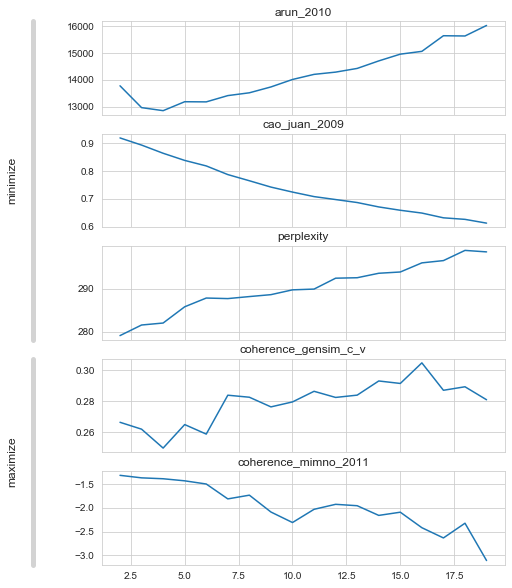

In [55]:
results1 = evaluate((id_1, corpus1), 2, 20, 1, stop1)

In [66]:
best_tm = [m for k, m in results1 if k == 5][0]['model']
best_tm.num_topics, best_tm.alpha, best_tm.eta  # just to make sure

(5,
 array([0.2, 0.2, 0.2, 0.2, 0.2], dtype=float32),
 array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1], dtype=float32))


Coherence Score:  0.264973118447852
5


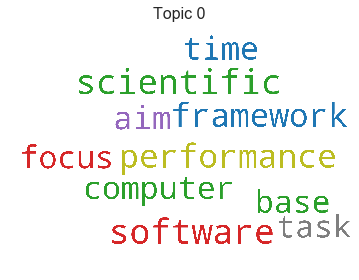

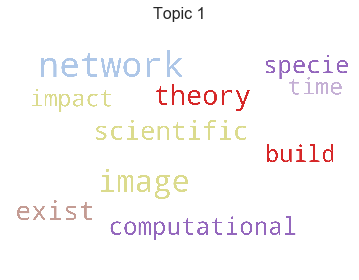

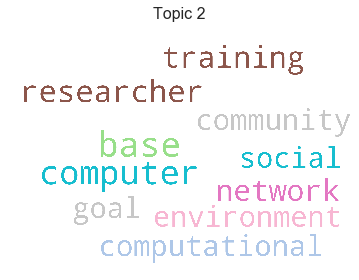

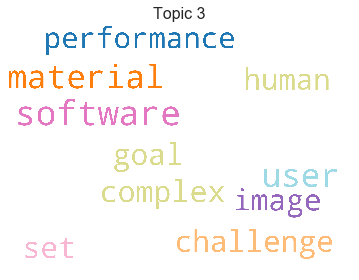

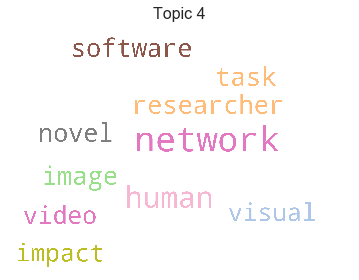

[(0,
  [('software', 0.0033896412),
   ('scientific', 0.0033281865),
   ('performance', 0.0030604703),
   ('framework', 0.0030277786),
   ('aim', 0.0029595788),
   ('time', 0.0028574904),
   ('computer', 0.0028335785),
   ('focus', 0.002792236),
   ('base', 0.0027914639),
   ('task', 0.0027604138)]),
 (1,
  [('network', 0.006894563),
   ('image', 0.0052853734),
   ('theory', 0.0040461603),
   ('exist', 0.0038723894),
   ('scientific', 0.0036921347),
   ('computational', 0.0032168543),
   ('specie', 0.0031978842),
   ('impact', 0.0030292189),
   ('build', 0.0029820725),
   ('time', 0.0029504038)]),
 (2,
  [('base', 0.0041403403),
   ('computer', 0.003872364),
   ('researcher', 0.0031889796),
   ('training', 0.0030298224),
   ('network', 0.0029919422),
   ('computational', 0.0028552278),
   ('community', 0.00283098),
   ('goal', 0.0028162063),
   ('environment', 0.0028063061),
   ('social', 0.0027842976)]),
 (3,
  [('software', 0.0048718182),
   ('user', 0.004364351),
   ('material', 0.0

In [67]:
model_1617 = LDA(id_1, corpus1, 5, stop1, best_tm)
model_1617.topic_wordcloud(10, plot=True)

In [68]:
file = open('1617_model.pkl','wb')
pickle.dump(best_tm, file)

In [65]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_1617.model, corpus1, dictionary=model_1617.model.id2word)
vis

/Users/shruti/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.001769 -0.002365       1        1  28.241259
1     -0.059721 -0.000416       2        1  19.125765
2     -0.045181  0.011992       3        1  15.522795
3      0.036603 -0.036511       4        1  13.607773
0      0.025009 -0.043858       5        1  13.014616
5      0.041520  0.071157       6        1  10.487787, topic_info=     Category        Freq            Term       Total  loglift  logprob
6777  Default   53.000000     lepidoptera   53.000000  30.0000  30.0000
6785  Default   53.000000  north_american   53.000000  29.0000  29.0000
1303  Default  154.000000        material  154.000000  28.0000  28.0000
6784  Default   40.000000            moth   40.000000  27.0000  27.0000
3169  Default  164.000000          specie  164.000000  26.0000  26.0000
...       ...         ...             ...         ...      ...      ...
673    Topic6   27.757732   undergraduate  205.333130   0.2538  -6.0542
270    Topic6   28.263868        training  244.057587   0.0991  -6.0362
135    Topic6   28.796680            time  278.386230  -0.0138  -6.0175
290    Topic6   27.108200         control  196.598206   0.2736  -6.0779
70     Topic6   26.824982      understand  245.640594   0.0404  -6.0884

[500 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
3691      1  0.114148       accent
3691      3  0.114148       accent
3691      5  0.684886       accent
1232      1  0.400264     activity
1232      2  0.184029     activity
...     ...       ...          ...
438       4  0.172208          way
438       5  0.062621          way
438       6  0.078276          way
8497      5  0.817368  whitefooted
8498      5  0.817136     zoonotic

[1228 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 3, 4, 1, 6])

In [62]:
pyLDAvis.save_html(vis, 'Visualization/1617_model.html')


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.008325  0.009606       1        1  30.814043
1      0.051313 -0.015929       2        1  20.370119
2      0.041956  0.023876       3        1  17.803047
3     -0.050443  0.044533       4        1  16.050934
0     -0.034501 -0.062085       5        1  14.961855, topic_info=     Category        Freq            Term       Total  loglift  logprob
6777  Default   52.000000     lepidoptera   52.000000  30.0000  30.0000
6785  Default   52.000000  north_american   52.000000  29.0000  29.0000
1303  Default  155.000000        material  155.000000  28.0000  28.0000
6784  Default   39.000000            moth   39.000000  27.0000  27.0000
4669  Default   40.000000   global_change   40.000000  26.0000  26.0000
...       ...         ...             ...         ...      ...      ...
203    Topic5   37.312824          theory  235.577240   0.0570  -6.1137
138    Topic5   37.483135            user  269.319794  -0.0723  -6.1091
522    Topic5   36.932186       integrate  247.004181  -0.0007  -6.1239
39     Topic5   36.737099          impact  293.216003  -0.1775  -6.1292
81     Topic5   35.311317           build  275.769531  -0.1557  -6.1688

[433 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
358       1  0.442223      ability
358       2  0.154778      ability
358       3  0.095815      ability
358       4  0.147408      ability
358       5  0.154778      ability
...     ...       ...          ...
1229      3  0.083195        voice
1229      4  0.027732        voice
1229      5  0.637826        voice
8497      5  0.811238  whitefooted
8498      5  0.811000     zoonotic

[951 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 3, 4, 1])

In [26]:
file = open('Pickled_models/1617_model.pkl','rb')
best_tm = pickle.load(file)
model_1617 = LDA(id_1, corpus1, 7, stop1, best_tm)


Coherence Score:  0.26905566266701386


In [69]:
docs_top_20 = model_1617.dominant_topics(10)

0
100
200
300
400
500
600


In [70]:
file = open('Pickled_docs/1617_top_20.pkl','wb')
pickle.dump(docs_top_20, file)

# 4. 2017-2018

In [71]:
infile = open('Pickled_Data/1718_data.pkl','rb')
id_1 =  pickle.load(infile)
corpus1 = pickle.load(infile)
stop1 = pickle.load(infile)
print(len(corpus1))

823


/Users/shruti/opt/anaconda3/lib/python3.7/site-packages/tmtoolkit/topicmod/visualize.py:561: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(**subplots_adjust_kwargs)


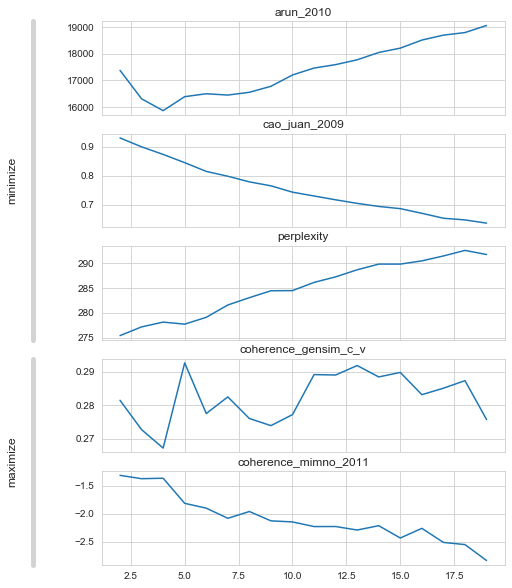

In [72]:
results1 = evaluate((id_1, corpus1), 2, 20, 1, stop1)

In [73]:
best_tm = [m for k, m in results1 if k == 5][0]['model']
best_tm.num_topics, best_tm.alpha, best_tm.eta  # just to make sure

(5,
 array([0.2, 0.2, 0.2, 0.2, 0.2], dtype=float32),
 array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1], dtype=float32))


Coherence Score:  0.2926084493004439
5


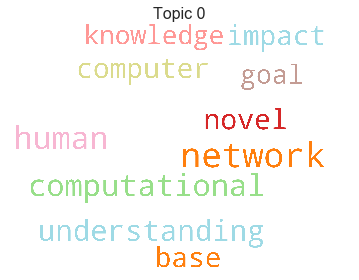

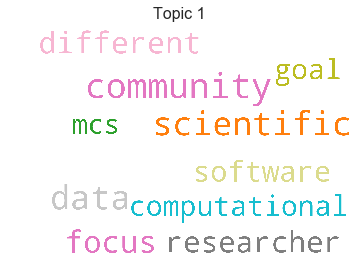

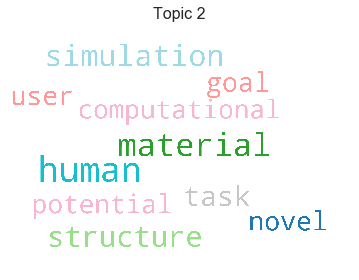

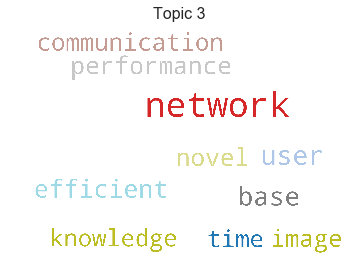

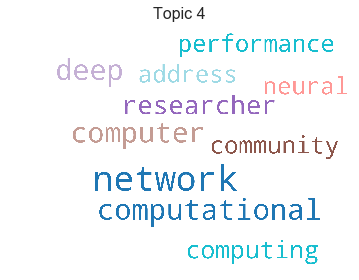

[(0,
  [('network', 0.005003992),
   ('human', 0.004136238),
   ('computational', 0.0038401142),
   ('understanding', 0.0034877101),
   ('novel', 0.003277696),
   ('computer', 0.0031867507),
   ('impact', 0.0031634718),
   ('base', 0.003150172),
   ('goal', 0.002872325),
   ('knowledge', 0.0028174617)]),
 (1,
  [('community', 0.004588463),
   ('data', 0.004329033),
   ('scientific', 0.0042349035),
   ('focus', 0.0035524797),
   ('different', 0.0034700423),
   ('researcher', 0.0032881182),
   ('software', 0.0031733902),
   ('computational', 0.0030533546),
   ('goal', 0.0030239196),
   ('mcs', 0.0027107438)]),
 (2,
  [('human', 0.005386142),
   ('material', 0.004617091),
   ('simulation', 0.003970658),
   ('structure', 0.003721343),
   ('task', 0.0034701342),
   ('goal', 0.0031616506),
   ('user', 0.003108881),
   ('novel', 0.003095544),
   ('computational', 0.0030427226),
   ('potential', 0.003026966)]),
 (3,
  [('network', 0.007506716),
   ('user', 0.0040451256),
   ('base', 0.00380887

In [74]:
model_1718 = LDA(id_1, corpus1, 5, stop1, best_tm)
model_1718.topic_wordcloud(10, plot=True)

In [79]:
file = open('1718_model.pkl','wb')
pickle.dump(best_tm, file)

In [75]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_1718.model, corpus1, dictionary=model_1718.model.id2word)

/Users/shruti/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [76]:
pyLDAvis.save_html(vis, 'Visualization/1718_model.html')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.001501  0.029173       1        1  29.818699
0      0.010884 -0.005899       2        1  23.507336
2      0.012469 -0.063319       3        1  17.507067
1     -0.077286  0.009964       4        1  15.478645
3      0.055435  0.030082       5        1  13.688257, topic_info=     Category        Freq            Term       Total  loglift  logprob
9390  Default   60.000000             mcs   60.000000  30.0000  30.0000
233   Default  723.000000         network  723.000000  29.0000  29.0000
31    Default  242.000000            data  242.000000  28.0000  28.0000
4272  Default   65.000000  microstructure   65.000000  27.0000  27.0000
285   Default  314.000000            user  314.000000  26.0000  26.0000
...       ...         ...             ...         ...      ...      ...
57     Topic5   48.602867            goal  402.993835  -0.1266  -6.0012
213    Topic5   46.375744       integrate  340.865692  -0.0061  -6.0481
392    Topic5   46.950943        computer  430.264832  -0.2267  -6.0357
435    Topic5   44.808414    optimization  277.609619   0.1648  -6.0824
391    Topic5   44.988865   computational  509.376770  -0.4381  -6.0784

[452 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
10160      3  1.009330    ablation
559        1  0.386942    activity
559        2  0.183464    activity
559        3  0.203478    activity
559        4  0.153443    activity
...      ...       ...         ...
1115       4  0.243753    workshop
1115       5  0.052574    workshop
9086       5  0.824607  worldwhile
557        1  0.100453     writing
557        3  0.803623     writing

[970 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 3, 2, 4])

In [31]:
file = open('Pickled_models/1718_model.pkl','rb')
best_tm = pickle.load(file)
model_1718 = LDA(id_1, corpus1, 9, stop1, best_tm)


Coherence Score:  0.27183618138927335


In [77]:
docs_top_20 = model_1718.dominant_topics(10)

0
100
200
300
400
500
600
700
800


In [78]:
file = open('Pickled_docs/1718_top_20.pkl','wb')
pickle.dump(docs_top_20, file)

# 5. 2018-2019

In [37]:
infile = open('Pickled_Data/1819_data.pkl','rb')
id_1 =  pickle.load(infile)
corpus1 = pickle.load(infile)
stop1 = pickle.load(infile)
print(len(corpus1))

1178


/Users/shruti/opt/anaconda3/lib/python3.7/site-packages/tmtoolkit/topicmod/visualize.py:561: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(**subplots_adjust_kwargs)


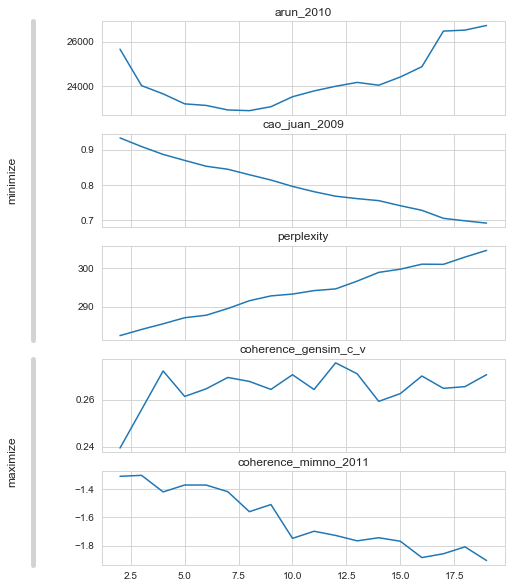

In [38]:
results1 = evaluate((id_1, corpus1), 2, 20, 1, stop1)

In [42]:
best_tm = [m for k, m in results1 if k == 7][0]['model']
best_tm.num_topics, best_tm.alpha, best_tm.eta  # just to make sure

(7, array([0.14285715, 0.14285715, 0.14285715, 0.14285715, 0.14285715,
        0.14285715, 0.14285715], dtype=float32), array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1], dtype=float32))


Coherence Score:  0.2696024485772082
7


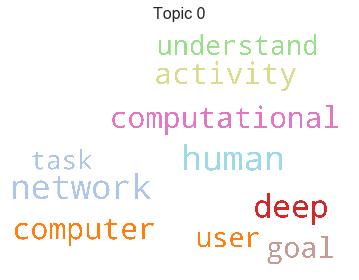

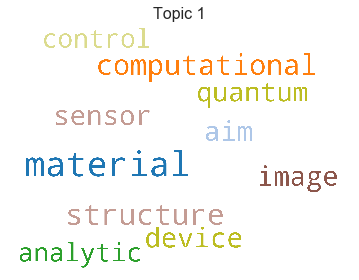

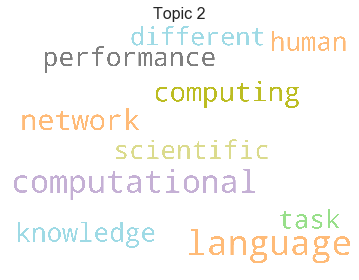

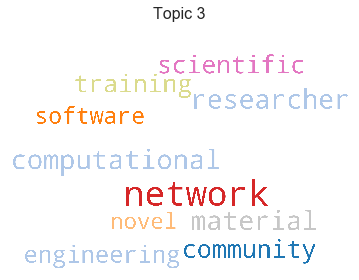

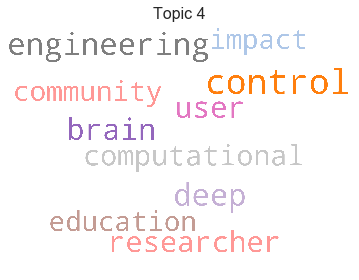

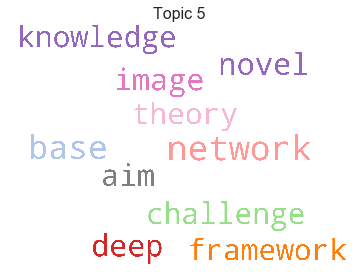

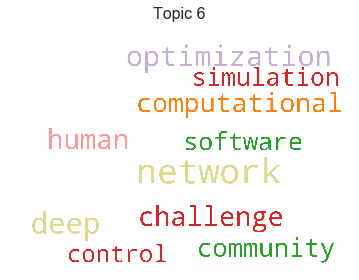

[(0,
  [('human', 0.0052267057),
   ('network', 0.0049606008),
   ('deep', 0.004367171),
   ('computer', 0.0038587137),
   ('activity', 0.003824138),
   ('computational', 0.003772269),
   ('goal', 0.0035174955),
   ('user', 0.0031772458),
   ('understand', 0.0031278534),
   ('task', 0.0029157328)]),
 (1,
  [('material', 0.0053242613),
   ('structure', 0.0037649),
   ('computational', 0.0034878002),
   ('device', 0.0032763125),
   ('sensor', 0.003248858),
   ('image', 0.0031754908),
   ('aim', 0.0031613635),
   ('quantum', 0.0031029382),
   ('control', 0.0028981774),
   ('analytic', 0.0028819116)]),
 (2,
  [('language', 0.0059781843),
   ('computational', 0.004956658),
   ('network', 0.00402172),
   ('computing', 0.003650901),
   ('performance', 0.0033792132),
   ('knowledge', 0.0033417202),
   ('scientific', 0.003316357),
   ('task', 0.003303949),
   ('human', 0.00325613),
   ('different', 0.0030907935)]),
 (3,
  [('network', 0.007834662),
   ('computational', 0.0044184793),
   ('mater

In [40]:
model_1819 = LDA(id_1, corpus1, 7, stop1, best_tm)
model_1819.topic_wordcloud(10, plot=True)

In [43]:
file = open('Pickled_models/1819_model.pkl','wb')
pickle.dump(best_tm, file)

In [ ]:
funding = model_1819.funding_per_topic('Awards1819.csv', False)

In [ ]:
file = open('Pickled_models/1819_model.pkl','rb')
best_tm = pickle.load(file)

In [10]:
model_1819 = LDA(id_1, corpus1, 9, stop1, best_tm)


Coherence Score:  0.2696024485772082


In [11]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_1819.model, corpus1, dictionary=model_1819.model.id2word)
vis

/Users/shruti/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.004010  0.016072       1        1  20.244747
0      0.014456  0.005281       2        1  15.260702
6     -0.047794  0.024265       3        1  14.858200
5     -0.005984 -0.002014       4        1  14.436410
2      0.039049 -0.054673       5        1  14.307080
1     -0.045813 -0.030449       6        1  11.519291
4      0.042075  0.041518       7        1   9.373578, topic_info=     Category        Freq          Term       Total  loglift  logprob
326   Default  332.000000      language  332.000000  30.0000  30.0000
1321  Default  244.000000       quantum  244.000000  29.0000  29.0000
29    Default  519.000000       control  519.000000  28.0000  28.0000
1248  Default  593.000000      material  593.000000  27.0000  27.0000
3800  Default   73.000000          sign   73.000000  26.0000  26.0000
...       ...         ...           ...         ...      ...      ...
101    Topic7   42.209335      multiple  315.818604   0.3547  -6.1320
149    Topic7   46.930344          task  520.420105  -0.0387  -6.0260
109    Topic7   46.013683  optimization  475.751251   0.0313  -6.0457
731    Topic7   46.528580         human  675.548340  -0.3082  -6.0346
186    Topic7   44.847878     different  437.667023   0.0891  -6.0713

[600 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
7272      5  0.972731          aac
4873      7  0.908960    aboveknee
8275      3  0.899349  abracadabra
8775      5  0.892075      abusive
6061      6  0.789868        acorn
...     ...       ...          ...
427       5  0.170378     workshop
427       6  0.047706     workshop
427       7  0.085189     workshop
9965      4  0.983870         wsis
8441      2  0.959843      yeaston

[1571 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 7, 6, 3, 2, 5])

In [12]:
pyLDAvis.save_html(vis, 'Visualization/1819_model.html')

In [41]:
file = open('Pickled_models/1819_model.pkl','rb')
best_tm = pickle.load(file)
model_1819 = LDA(id_1, corpus1, 10, stop1, best_tm)


Coherence Score:  0.4525761312435169


In [13]:
docs_top_20 = model_1819.dominant_topics(10)

0
100
200
300
400
500
600
700
800
900
1000
1100


In [14]:
file = open('Pickled_docs/1819_top_20.pkl','wb')
pickle.dump(docs_top_20, file)

# 6. 2019-2020 Corpus

In [30]:
infile = open('Pickled_Data/1920_data.pkl','rb')
id_1 =  pickle.load(infile)
corpus1 = pickle.load(infile)
stop1 = pickle.load(infile)
print(len(corpus1))

1618


/Users/shruti/opt/anaconda3/lib/python3.7/site-packages/tmtoolkit/topicmod/visualize.py:561: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(**subplots_adjust_kwargs)


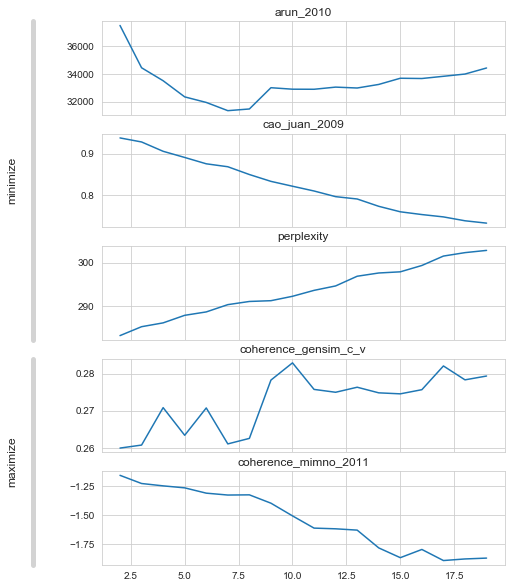

In [31]:
results1 = evaluate((id_1, corpus1), 2, 20, 1, stop1)

In [32]:
best_tm = [m for k, m in results1 if k == 6][0]['model']
best_tm.num_topics, best_tm.alpha, best_tm.eta  # just to make sure

(6, array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667], dtype=float32), array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1], dtype=float32))


Coherence Score:  0.27078725201848264
6


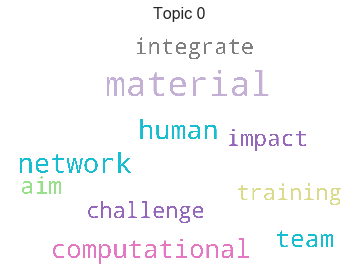

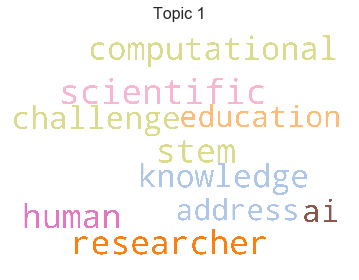

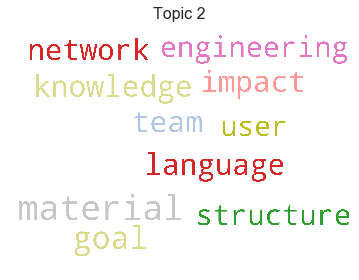

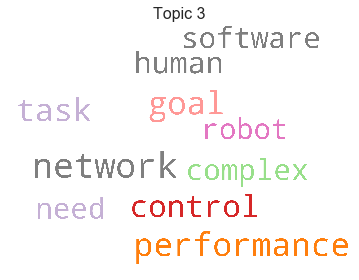

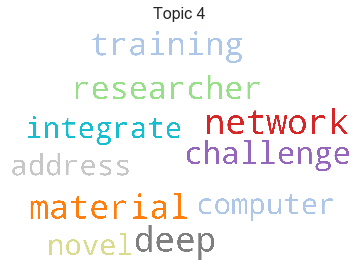

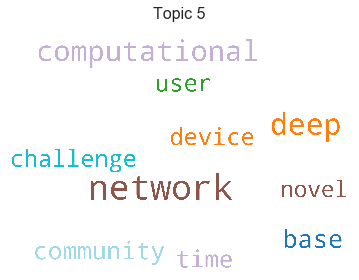

[(0,
  [('material', 0.007989889),
   ('network', 0.0045230812),
   ('human', 0.0043644477),
   ('computational', 0.0040184907),
   ('team', 0.0037168602),
   ('aim', 0.0033013974),
   ('impact', 0.0030865767),
   ('integrate', 0.0029847412),
   ('training', 0.0029308589),
   ('challenge', 0.0029188523)]),
 (1,
  [('scientific', 0.004205715),
   ('stem', 0.0038991452),
   ('human', 0.0038722728),
   ('researcher', 0.0038261688),
   ('computational', 0.0035712675),
   ('knowledge', 0.0035524585),
   ('challenge', 0.003420838),
   ('ai', 0.0032851042),
   ('education', 0.0031183932),
   ('address', 0.0030672634)]),
 (2,
  [('material', 0.0043540485),
   ('goal', 0.0035496606),
   ('team', 0.003185936),
   ('knowledge', 0.0031682733),
   ('language', 0.0031088875),
   ('impact', 0.0031031994),
   ('network', 0.0030503517),
   ('structure', 0.003026625),
   ('engineering', 0.0029505286),
   ('user', 0.0029071728)]),
 (3,
  [('network', 0.003936509),
   ('performance', 0.0034987922),
   ('g

In [33]:
model_1920 = LDA(id_1, corpus1, 6, stop1, best_tm)
model_1920.topic_wordcloud(10, plot=True)

In [20]:
file = open('1920_model.pkl','wb')
pickle.dump(best_tm, file)

In [ ]:
file = open('Pickled_models/1920_model.pkl','rb')
best_tm = pickle.load(file)

In [ ]:
model_1920 = LDA(id_1, corpus1, 8, stop1, best_tm)

In [ ]:
funding = model_1920.funding_per_topic('Awards1920.csv', False)

In [34]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_1920.model, corpus1, dictionary=model_1920.model.id2word)
vis

/Users/shruti/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.011739 -0.003378       1        1  26.292007
5     -0.030183  0.013676       2        1  18.249203
4     -0.030705  0.005851       3        1  17.550707
3     -0.003566  0.019811       4        1  14.697146
2      0.015250 -0.061607       5        1  12.084391
1      0.060943  0.025646       6        1  11.126552, topic_info=     Category         Freq           Term        Total  loglift  logprob
422   Default  1136.000000       material  1136.000000  30.0000  30.0000
93    Default   405.000000           stem   405.000000  29.0000  29.0000
761   Default   308.000000       language   308.000000  28.0000  28.0000
1922  Default   289.000000        robotic   289.000000  27.0000  27.0000
1195  Default   344.000000          robot   344.000000  26.0000  26.0000
...       ...          ...            ...          ...      ...      ...
348    Topic6    79.875732          novel   742.849854  -0.0342  -6.0040
439    Topic6    78.506744  understanding   676.160889   0.0426  -6.0213
36     Topic6    77.712936    engineering   733.938171  -0.0496  -6.0314
186    Topic6    75.540192      community   765.422119  -0.1199  -6.0598
397    Topic6    75.260918           base   735.851624  -0.0842  -6.0635

[539 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
177       1  0.187472   achieve
177       2  0.150546   achieve
177       3  0.170429   achieve
177       4  0.272687   achieve
177       5  0.133503   achieve
...     ...       ...       ...
443       2  0.246265  workshop
443       3  0.298254  workshop
443       4  0.101242  workshop
443       5  0.087561  workshop
443       6  0.062934  workshop

[1262 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 5, 4, 3, 2])

In [35]:
pyLDAvis.save_html(vis, 'Visualization/1920_model.html')

In [ ]:
file = open('Pickled_models/1920_model.pkl','rb')
best_tm = pickle.load(file)

In [57]:
model_1920 = LDA(id_1, corpus1, 8, stop1, best_tm)


Coherence Score:  0.4830308861255704


In [22]:
docs_top_20 = model_1920.dominant_topics(10)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600


In [23]:
file = open('Pickled_docs/1920_top_20.pkl','wb')
pickle.dump(docs_top_20, file)

# 7. 2013-2014 Corpus

In [27]:
infile = open('Pickled_Data/1314_data.pkl','rb')
id_1 =  pickle.load(infile)
corpus1 = pickle.load(infile)
stop1 = pickle.load(infile)

/Users/shruti/opt/anaconda3/lib/python3.7/site-packages/tmtoolkit/topicmod/visualize.py:561: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(**subplots_adjust_kwargs)


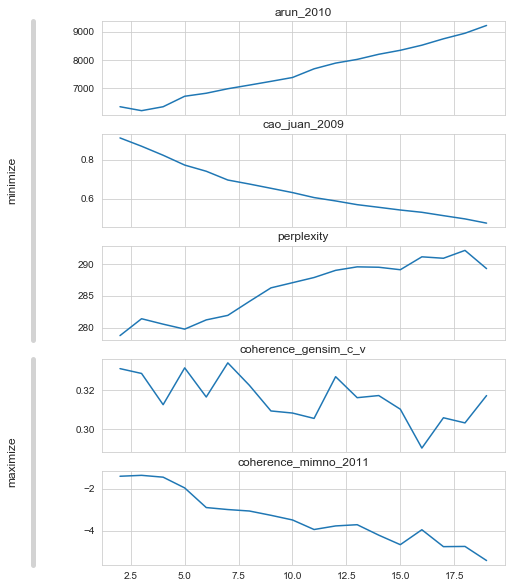

In [28]:
results1 = evaluate((id_1, corpus1), 2, 20, 1, stop1)

In [37]:
best_tm = [m for k, m in results1 if k == 5][0]['model']
best_tm.num_topics, best_tm.alpha, best_tm.eta  # just to make sure

(5,
 array([0.2, 0.2, 0.2, 0.2, 0.2], dtype=float32),
 array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1], dtype=float32))


Coherence Score:  0.33160929278630175
5


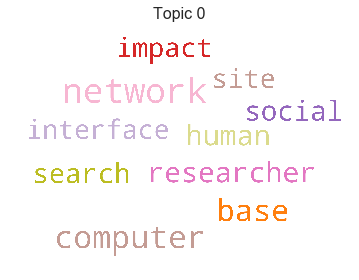

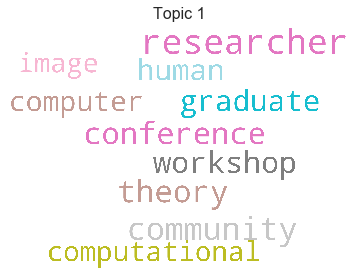

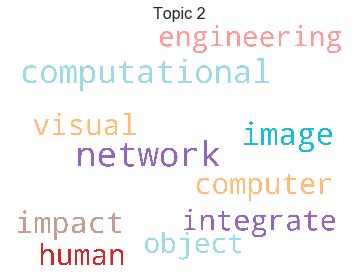

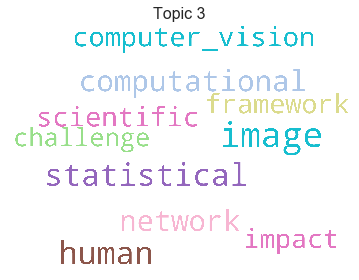

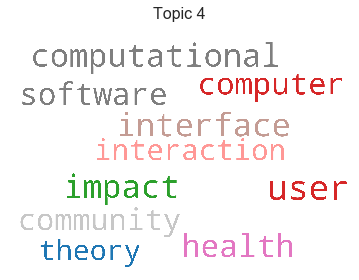

[(0,
  [('network', 0.0055735568),
   ('computer', 0.0045713447),
   ('base', 0.00416575),
   ('human', 0.0036675055),
   ('researcher', 0.0036381918),
   ('social', 0.0034502044),
   ('search', 0.0033914335),
   ('site', 0.003283053),
   ('impact', 0.0032765658),
   ('interface', 0.0032105853)]),
 (1,
  [('researcher', 0.0054329257),
   ('community', 0.0045348136),
   ('theory', 0.004298095),
   ('conference', 0.0041962373),
   ('workshop', 0.004095536),
   ('graduate', 0.0039190543),
   ('human', 0.0038724833),
   ('computer', 0.00360671),
   ('computational', 0.0034277344),
   ('image', 0.0032969094)]),
 (2,
  [('network', 0.004615774),
   ('computational', 0.003980566),
   ('image', 0.0036546763),
   ('impact', 0.0034922294),
   ('visual', 0.0032708389),
   ('human', 0.003241212),
   ('computer', 0.003235474),
   ('integrate', 0.0032149267),
   ('engineering', 0.0029993204),
   ('object', 0.002993222)]),
 (3,
  [('image', 0.0060128514),
   ('human', 0.004980986),
   ('statistical',

In [38]:
model_1314 = LDA(id_1, corpus1, 5, stop1, best_tm)
model_1314.topic_wordcloud(10, plot=True)

In [40]:
file = open('Pickled_models/1314_model.pkl','wb')
pickle.dump(best_tm, file)

In [36]:
file = open('Pickled_models/1314_model.pkl','rb')
best_tm = pickle.load(file)

In [37]:
model_1314 = LDA(id_1, corpus1, 3, stop1, best_tm)


Coherence Score:  0.2511903500315246


In [39]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_1314.model, corpus1, dictionary=model_1314.model.id2word)

pyLDAvis.save_html(vis, 'Visualization/1314_model.html')
vis

/Users/shruti/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.015078  0.029850       1        1  26.625237
3      0.011173  0.004541       2        1  25.566847
1      0.085429 -0.029541       3        1  18.541510
2     -0.042869  0.065109       4        1  15.184501
0     -0.068811 -0.069960       5        1  14.081913, topic_info=     Category        Freq             Term       Total  loglift  logprob
2729  Default   36.000000  behavior_change   36.000000  30.0000  30.0000
4004  Default   23.000000              arg   23.000000  29.0000  29.0000
6145  Default   25.000000           pollen   25.000000  28.0000  28.0000
83    Default  108.000000        interface  108.000000  27.0000  27.0000
307   Default  186.000000          network  186.000000  26.0000  26.0000
...       ...         ...              ...         ...      ...      ...
192    Topic5   18.737755            focus  113.178307   0.1619  -6.0247
623    Topic5   17.360174          analyze   88.206123   0.3348  -6.1010
330    Topic5   18.272272       scientific  138.130630  -0.0625  -6.0498
291    Topic5   17.948990        important  122.557838   0.0392  -6.0677
163    Topic5   18.523159        community  176.204346  -0.2923  -6.0362

[432 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
4687      5  0.911268  accumulate
3396      3  0.904964         acl
148       1  0.239766      action
148       2  0.283359      action
148       3  0.414140      action
...     ...       ...         ...
2369      1  0.153765       young
2369      2  0.215272       young
2369      3  0.492049       young
2369      4  0.061506       young
2369      5  0.092259       young

[940 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 2, 3, 1])

In [41]:
docs_top_20 = model_1314.dominant_topics(10)


0
100
200
300


In [42]:
file = open('Pickled_docs/1314_top_20.pkl','wb')
pickle.dump(docs_top_20, file)

# 8. 2012-2013

In [43]:
infile = open('Pickled_Data/1213_data.pkl','rb')
id_1 =  pickle.load(infile)
corpus1 = pickle.load(infile)
stop1 = pickle.load(infile)

/Users/shruti/opt/anaconda3/lib/python3.7/site-packages/tmtoolkit/topicmod/visualize.py:561: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(**subplots_adjust_kwargs)


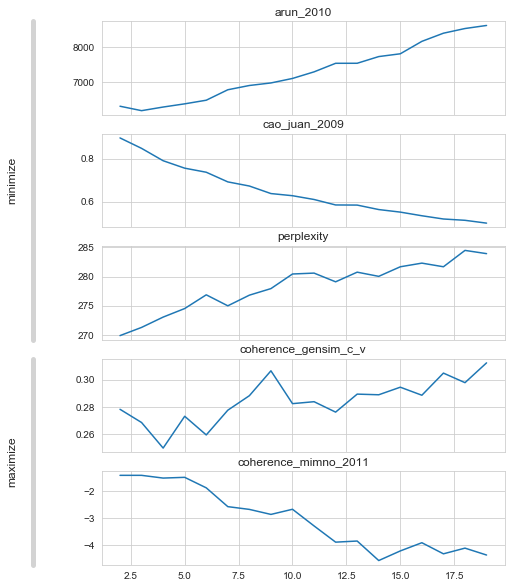

In [44]:
results1 = evaluate((id_1, corpus1), 2, 20, 1, stop1)

In [56]:
best_tm = [m for k, m in results1 if k == 4][0]['model']
best_tm.num_topics, best_tm.alpha, best_tm.eta  # just to make sure

(4,
 array([0.25, 0.25, 0.25, 0.25], dtype=float32),
 array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1], dtype=float32))


Coherence Score:  0.2498170891375951
4


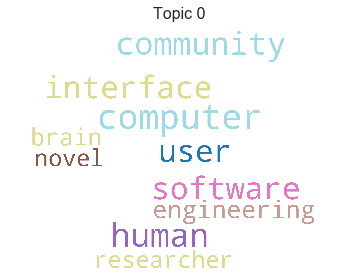

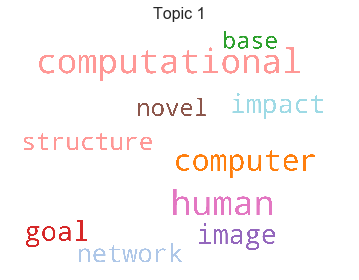

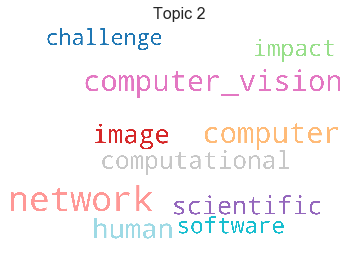

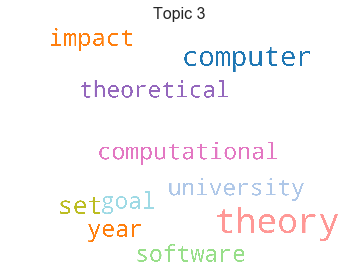

[(0,
  [('computer', 0.0047491495),
   ('human', 0.0042012534),
   ('community', 0.003904949),
   ('interface', 0.0037982618),
   ('software', 0.0037826532),
   ('user', 0.0036943234),
   ('engineering', 0.0036799815),
   ('brain', 0.0034295348),
   ('novel', 0.0033010503),
   ('researcher', 0.0032926244)]),
 (1,
  [('human', 0.006029582),
   ('computational', 0.005898316),
   ('computer', 0.0044323374),
   ('goal', 0.003590303),
   ('image', 0.0035663554),
   ('impact', 0.0034785212),
   ('network', 0.0032055427),
   ('structure', 0.0029780776),
   ('novel', 0.0028449332),
   ('base', 0.002670277)]),
 (2,
  [('network', 0.009228377),
   ('computer', 0.0061028153),
   ('computer_vision', 0.0060794814),
   ('human', 0.0053522466),
   ('image', 0.004881982),
   ('scientific', 0.0046352795),
   ('computational', 0.0043793195),
   ('impact', 0.0038608972),
   ('software', 0.0037151333),
   ('challenge', 0.0033824004)]),
 (3,
  [('theory', 0.0076794475),
   ('computer', 0.0044155535),
   ('

In [57]:
model_1213 = LDA(id_1, corpus1, 4, stop1, best_tm)
model_1213.topic_wordcloud(10, plot=True)

In [59]:
file = open('Pickled_models/1213_model.pkl','wb')
pickle.dump(best_tm, file)

In [58]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_1213.model, corpus1, dictionary=model_1213.model.id2word)

pyLDAvis.save_html(vis, 'Visualization/1213_model.html')
vis

/Users/shruti/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.012338 -0.003773       1        1  38.831593
0     -0.016334 -0.068117       2        1  28.974495
2     -0.062254  0.050240       3        1  18.014891
3      0.090926  0.021649       4        1  14.179021, topic_info=     Category        Freq             Term       Total  loglift  logprob
526   Default  206.000000          network  206.000000  30.0000  30.0000
403   Default  152.000000           theory  152.000000  29.0000  29.0000
15    Default  152.000000  computer_vision  152.000000  28.0000  28.0000
299   Default   62.000000             year   62.000000  27.0000  27.0000
3464  Default   19.000000        transport   19.000000  26.0000  26.0000
...       ...         ...              ...         ...      ...      ...
305    Topic4   17.873564          address  115.292816   0.0893  -6.0490
6      Topic4   17.642458            apply  113.438431   0.0925  -6.0620
526    Topic4   18.837358          network  206.433731  -0.4407  -5.9965
51     Topic4   17.165039       processing  118.546204   0.0210  -6.0895
15     Topic4   16.447565  computer_vision  152.646896  -0.2745  -6.1322

[362 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
3203      4  0.830778     aaronson
4404      3  0.869755  accelerator
3615      4  0.854155          acl
731       1  0.079764     acoustic
731       2  0.917281     acoustic
...     ...       ...          ...
561       4  0.108620     workshop
299       1  0.353751         year
299       2  0.176875         year
299       3  0.080398         year
299       4  0.385910         year

[688 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

In [60]:
docs_top_20 = model_1213.dominant_topics(10)

0
100
200
300


In [61]:
file = open('Pickled_docs/1213_top_20.pkl','wb')
pickle.dump(docs_top_20, file)

# 9. 2011-2012

In [16]:
infile = open('Pickled_Data/1112_data.pkl','rb')
id_1 =  pickle.load(infile)
corpus1 = pickle.load(infile)
stop1 = pickle.load(infile)

/Users/shruti/opt/anaconda3/lib/python3.7/site-packages/tmtoolkit/topicmod/visualize.py:561: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(**subplots_adjust_kwargs)


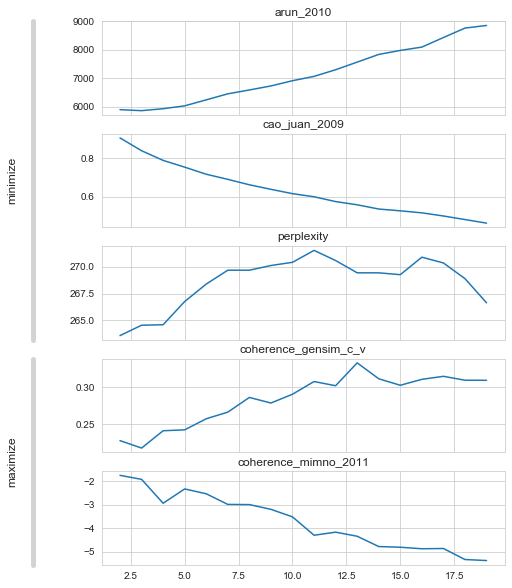

In [17]:
results1 = evaluate((id_1, corpus1), 2, 20, 1, stop1)

In [22]:
best_tm = [m for k, m in results1 if k == 3][0]['model']
best_tm.num_topics, best_tm.alpha, best_tm.eta  # just to make sure

(3,
 array([0.33333334, 0.33333334, 0.33333334], dtype=float32),
 array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1], dtype=float32))


Coherence Score:  0.2181862858865856
3


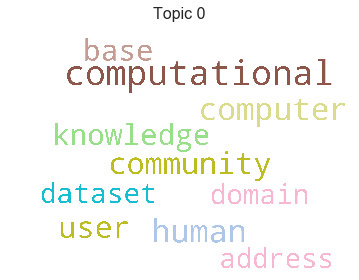

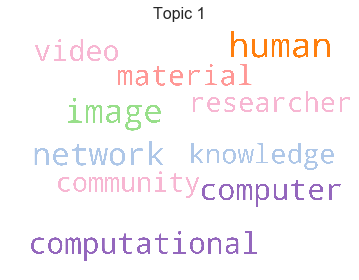

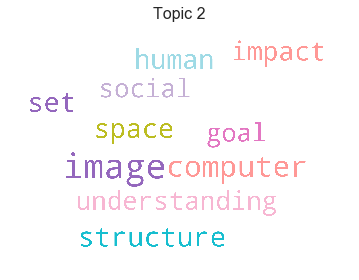

[(0,
  [('computational', 0.005010624),
   ('human', 0.0041927183),
   ('computer', 0.004018568),
   ('community', 0.0037559252),
   ('user', 0.0037521266),
   ('knowledge', 0.0035271829),
   ('base', 0.003522989),
   ('dataset', 0.0032160038),
   ('domain', 0.0031556399),
   ('address', 0.003066509)]),
 (1,
  [('human', 0.005769276),
   ('image', 0.0051618665),
   ('network', 0.0047800005),
   ('computer', 0.004257407),
   ('computational', 0.0041707233),
   ('video', 0.0038786377),
   ('material', 0.0038425575),
   ('knowledge', 0.0034734963),
   ('researcher', 0.0034636965),
   ('community', 0.0034012038)]),
 (2,
  [('image', 0.006009536),
   ('computer', 0.0042435653),
   ('structure', 0.0036574716),
   ('set', 0.0035434114),
   ('human', 0.0035071543),
   ('space', 0.0034981926),
   ('impact', 0.0033597478),
   ('understanding', 0.0032464052),
   ('social', 0.0032419816),
   ('goal', 0.0031190447)])]

In [23]:
model_1112 = LDA(id_1, corpus1, 3, stop1, best_tm)
model_1112.topic_wordcloud(10, plot=True)

In [25]:
file = open('Pickled_models/1112_model.pkl','wb')
pickle.dump(best_tm, file)

In [24]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_1112.model, corpus1, dictionary=model_1112.model.id2word)

pyLDAvis.save_html(vis, 'Visualization/1112_model.html')
vis

/Users/shruti/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.038548  0.044705       1        1  41.613476
0     -0.032048 -0.047536       2        1  38.396259
2      0.070596  0.002831       3        1  19.990259, topic_info=     Category        Freq           Term       Total  loglift  logprob
3542  Default   49.000000           fmri   49.000000  30.0000  30.0000
877   Default   57.000000          space   57.000000  29.0000  29.0000
55    Default  217.000000          image  217.000000  28.0000  28.0000
1675  Default  117.000000            asl  117.000000  27.0000  27.0000
99    Default  113.000000      structure  113.000000  26.0000  26.0000
...       ...         ...            ...         ...      ...      ...
179    Topic3   23.981373  undergraduate   95.000229   0.2333  -6.0348
67     Topic3   25.466702          novel  131.045898  -0.0283  -5.9747
192    Topic3   25.954762           base  154.438828  -0.1735  -5.9557
3      Topic3   24.771261        address  127.850899  -0.0313  -6.0024
357    Topic3   23.887899      challenge  131.183441  -0.0933  -6.0387

[276 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
352       1  0.270715   ability
352       2  0.615261   ability
352       3  0.110747   ability
116       1  0.592694  activity
116       2  0.338682  activity
...     ...       ...       ...
1870      1  0.951966  wildlife
1870      2  0.050103  wildlife
113       1  0.787851  workshop
113       2  0.189084  workshop
113       3  0.015757  workshop

[431 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [26]:
docs_top_20 = model_1112.dominant_topics(10)

0
100
200
300


In [27]:
file = open('Pickled_docs/1112_top_20.pkl','wb')
pickle.dump(docs_top_20, file)

# 10. 2010-2011

In [4]:
infile = open('Pickled_Data/1011_data.pkl','rb')
id_1 =  pickle.load(infile)
corpus1 = pickle.load(infile)
stop1 = pickle.load(infile)

/Users/shruti/opt/anaconda3/lib/python3.7/site-packages/tmtoolkit/topicmod/visualize.py:561: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(**subplots_adjust_kwargs)


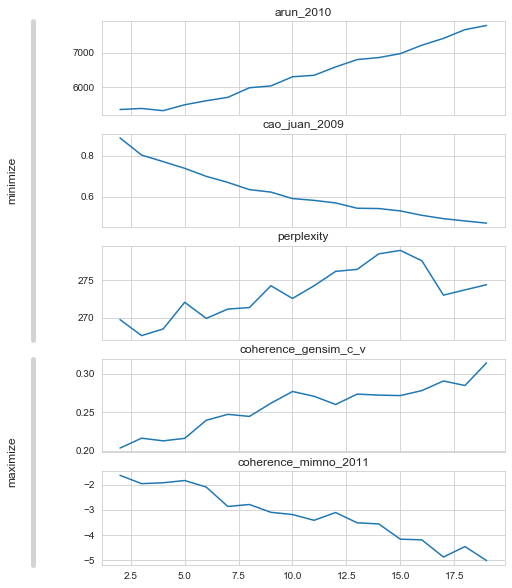

In [5]:
results1 = evaluate((id_1, corpus1), 2, 20, 1, stop1)

In [6]:
best_tm = [m for k, m in results1 if k == 3][0]['model']
best_tm.num_topics, best_tm.alpha, best_tm.eta  # just to make sure

(3,
 array([0.33333334, 0.33333334, 0.33333334], dtype=float32),
 array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1], dtype=float32))


Coherence Score:  0.21611263952226165
3


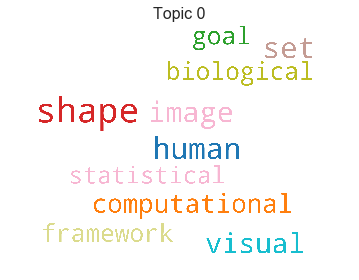

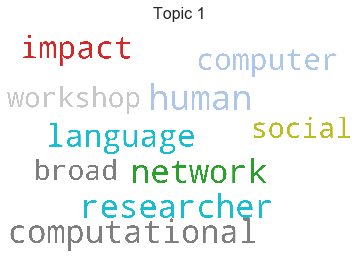

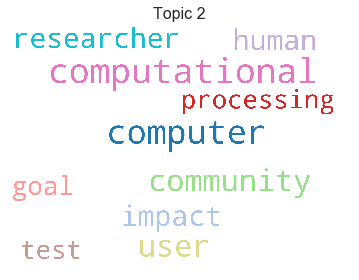

[(0,
  [('shape', 0.0079203565),
   ('human', 0.0055926978),
   ('set', 0.005502703),
   ('image', 0.005259774),
   ('visual', 0.004974944),
   ('computational', 0.0043361206),
   ('biological', 0.0039222357),
   ('goal', 0.0039038435),
   ('framework', 0.0038713294),
   ('statistical', 0.0036349364)]),
 (1,
  [('human', 0.0044980524),
   ('network', 0.003967042),
   ('researcher', 0.0038956346),
   ('computational', 0.0038462623),
   ('impact', 0.0037121247),
   ('language', 0.0036265221),
   ('computer', 0.0033004386),
   ('social', 0.0029317192),
   ('broad', 0.0028767057),
   ('workshop', 0.0028713827)]),
 (2,
  [('computational', 0.005976883),
   ('computer', 0.0055449135),
   ('user', 0.0045836577),
   ('community', 0.0045573236),
   ('human', 0.0039448827),
   ('impact', 0.00394423),
   ('researcher', 0.0038416865),
   ('goal', 0.003320975),
   ('processing', 0.0032640407),
   ('test', 0.00325094)])]

In [7]:
model_1011 = LDA(id_1, corpus1, 3, stop1, best_tm)
model_1011.topic_wordcloud(10, plot=True)

In [8]:
file = open('Pickled_models/1011_model.pkl','wb')
pickle.dump(best_tm, file)

In [4]:
file = open('Pickled_models/1011_model.pkl','rb')
best_tm = pickle.load(file)
model_1011 = LDA(id_1, corpus1, 3, stop1, best_tm)

EOFError: Ran out of input

In [9]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_1011.model, corpus1, dictionary=model_1011.model.id2word)

pyLDAvis.save_html(vis, 'Visualization/1011_model.html')
vis

/Users/shruti/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.001682 -0.060632       1        1  47.366768
2     -0.067600  0.029170       2        1  26.463928
0      0.065918  0.031462       3        1  26.169300, topic_info=     Category        Freq             Term       Total  loglift  logprob
1012  Default   98.000000            shape   98.000000  30.0000  30.0000
664   Default  104.000000           visual  104.000000  29.0000  29.0000
830   Default   40.000000           specie   40.000000  28.0000  28.0000
622   Default   69.000000       biological   69.000000  27.0000  27.0000
1193  Default   56.000000         material   56.000000  26.0000  26.0000
...       ...         ...              ...         ...      ...      ...
31     Topic3   27.762655      environment   94.310005   0.1177  -6.0120
404    Topic3   27.812086        important  100.098648   0.0599  -6.0102
87     Topic3   27.327305       researcher  151.290405  -0.3707  -6.0278
92     Topic3   26.040588           search   82.738640   0.1846  -6.0760
212    Topic3   26.207155  computer_vision   93.287598   0.0709  -6.0696

[279 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1087      1  0.698098    access
1087      2  0.099728    access
1087      3  0.199456    access
254       2  0.968838  acoustic
619       1  0.426065  activity
...     ...       ...       ...
110       1  0.566583  workshop
110       2  0.278490  workshop
110       3  0.153650  workshop
5805      1  0.993927      york
5335      2  0.968615  yosemite

[436 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [13]:
docs_top_20 = model_1011.dominant_topics(10)

0
100
200
300


In [15]:
file = open('Pickled_docs/1011_top_20.pkl','wb')
pickle.dump(docs_top_20, file)